# Mel Schwan, Stuart Miller, Justin Howard, Paul Adams
# Lab Three: Clustering, Association Rules, or Recommenders
## Capstone: Association Rule Mining, Clustering, or Collaborative Filtering

### Lab3 Project Requirments -
1. [Business understanding](#Businessunderstanding)
    1. [Describe the purpose of the data set you selected](#Assessthecurrentsituation)
    2. [Describe how you would define and measure the outcomes from the dataset](#CostBenefit)
    3. [How would you measure the effectiveness of a good prediction algorithm](#Desiredoutputs)
  
2. [Data Understanding](#Dataunderstanding)
    1. [Describe the meaning and type of data for each attribute in the data file](#Describedata)
    2. [Verify data quality: Explain any missing values, duplicate data, and outliers](#Datareport)
    3. [Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean](#Stats)
    4. [Visualize the most important attributes appropriately (at least 5 attributes)](#Distributions)
    5. [Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate](#Correlations)
    6. [Identify and explain interesting relationships between features and the class you are trying to predict](#relationships)
    7. [Are there other features that could be added to the data or created from existing features? Which ones?](#Featurecreation)
    8. [Outlier Removal](#OutlierRemoval)

3. [Modeling and Evaluation](#Model)
    1. [Cluster Analysis](#Cluster)
        1. [PCA](#KMPCA)
        2. [Random Forest Leaf Embeddings](#RF)
        3. [Autoencoder Embeddings](#Autoencoder)
    
4. [Deployment](#Deployment)
    1. [How useful is your model for interested parties? ](#Useful)
    2. [How would you measure the model's value if it was used by these parties?](#Value)
    3. [How would your deploy your model for interested parties?](#Deploy)
    4. [How often would your model need to be updated?](#Update)
    5. [What other data should be collected? ](#Collect)

A1. [Model Hyperparameter Tuning Details](#A2)


Our project will follow a hybrid methodology, mixing the expectations of the grading rubric with the CRISP_DM framework. CRISP-DM stands for the cross-industry process for data mining, which provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

We are continuing the data cleaning and preperation loop for preparing the dataset for cluster analysis.

In the final we have choosen to test different models for clustering of our dataset. The two approaches we have taken are
* [Model A: KMeans Clustering](#KMeans)
* [Model B: t-SNE Clustering](#t-SNE)


<img src="../_images/crisps-dm3.png" style="width:550px;height:450px"/>


# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>
We will use the Home Credit Default Risk dataset made available on Kaggle to develop a useful model that predicts loan defaults for a majority of the loan applicants whose population is defined by the given training and test datasets. Predicting loan defaults is essential to the profitability of banks and, given the competitive nature of the loan market, a bank that collects the right data can offer and service more loans. This analysis of Home Credit's Default Risk dataset will focus on generating accurate loan default risk probabilities, identifying sub-populations among the given applicants, and finally, the most critical factors that indicate that an applicant will likely default on their loan.

## 1.1 Assess the Current Situation (Q1A)<a class="anchor" id="Assessthecurrentsituation"></a>
Home Credit is an international non-bank financial institution that operates in 10 countries and focuses on lending to people with little or no credit history. This institution has served 11 million customers, is based in the Czechia, and is a significant consumer lender in most of the Commonwealth of Independent States Countries, especially Russia. Recently, it has established a presence in China and the United States. The dataset provided is extensive, representing 307,511 applications from various locations. 

The data types vary in scale and type, from time-series credit histories to demographic indicators. Our analysis will focus on two datasets, data collected in the application train and test datasets, and several engineered features gathered from the millions of credit bureau records for each loan applicant.

### 1.1.2. Measuring the effectiveness of a good algorithm- <a class="anchor" id="Requirements"></a> 
#### 1. Effective Clustering Metric: Cluster Validity

The dataset contains 326 attributes for 307,511 loan applicants. An algorithm that clusters the dataset with a high degree of cluster validity will be difficult to obtain due to the high space-time complexity of clustering algorithms at our disposal. To reduce the space-time complexity of the dataset, we have elected to perform K-Means clustering on the first two principal components.

- **Business success criteria**

- **Data mining success criteria**

#### 2. Effective Association Rule Determination

- **Business success criteria**

- **Data mining success criteria**

#### 3. Effective Collaborative Filtering

- **Business success criteria**

- **Data mining success criteria**

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Initial Data Report (Q2) <a class="anchor" id="Datareport"></a>
Our data comes from the [Kaggle Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/overview) competition website. 

Our analysis features the use of several Python libraries, such as Pandas, in addition to a custom data cleaning script for both the `application` and `bureau` datasets. 

In [1]:
# Import Libraries Required.
from os import path
import pickle

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import IFrame

# some defaults
pd_max_rows_default = 60

import umap
import hdbscan

from sklearn import mixture
from sklearn.preprocessing import label_binarize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# import custom code
from project_code.cleaning import read_clean_data, missing_values_table, load_bureau, create_newFeatures, fill_occupation_type
from project_code.tables import count_values_table
from project_code.clustering import AutoEncoder
from project_code.random_forest import TreeImportances

#removing warnings
import warnings
warnings.simplefilter('ignore')

# random setting
random_state = 42

In [2]:
# load the data

# original data with no transformations
data = pd.read_csv('../_data/cluster_data.csv')

# normalized data for clustering
data_std = pd.read_csv('../_data/std_df.csv')

To avoid inserting random noise from the principal component analysis, we will use the minimum number of Principal Components to arrive at a cumulative variance of 99%.

## 2.2 Verify data quality: Explain any missing values, duplicate data, and outliers (Q2B) <a class="anchor" id="Datareport"></a>
We will use two of the files from the total dataset.

application_train.csv: Information provided with each loan application
bureau.csv: Information regarding clients from the credit bureaus
The two data files can be joined on the loan id (SK_ID_CURR).


## 2.3 Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean (Q2C) <a class="anchor" id="Stats"></a>



#### Data Cleaning Script

All the cleaning discussed in the sections above are implemented in `cleaning.py`.
This script contains a function (`read_clean_data`) to apply the cleaning steps and return the cleaned dataset for work.

**Details**  
* Cleaning
  * Read csv with Pandas (setting correct data types)
  * Drop columns that will not be used
  * Recode NA values that are not listed as np.nan
  * Formattings
  * Encode categorical variables
* Returns
  * DataFrame with cleaned data


## 2.4 Visualize the most important attributes appropriately (Q2D) <a class="anchor" id="Visualize"></a>

info

-


### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

This part of the exploration focused on the use of box plots and histograms for visualing continuous variables and bar charts for visualizing categorical variables. These graphical formats permit the easy identification of skewedness and help us identify outliers. 

Variables we expect to be important were selected for univariate visualization, such as `AMT_INCOME_TOTAL` and `AMT_ANNUITY`. The histogram shows the features of the main distribution, while the behavior of the tails and extreme values are shown in the boxplots. The distribution of incomes is extremely long-tailed and right-skewed, as can be expected with most any income distribution. 

Boxplots indicate a large number of outliers in both the `AMT_TOTAL_INCOME` and `AMT_ANNUITY` feature and one extreme outlier that will require closer exmaination. A comparison of each distribution in its raw and transformed form is displayed below.

## 2.5 Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate (Q2E) <a class="anchor" id="Correlations"></a>


info

## 2.6 Identify and explain interesting relationships between features and the class you are trying to predict (Q2F) <a class="anchor" id="relationships"></a>

infor

## 2.7 Are there other features that could be added to the data or created from existing features (Q2G) <a class="anchor" id="Featurecreation"></a>
Info

# 3. Stage  Three - Modeling and Evaluation <a class="anchor" id="Model"></a>

## 3.1 Option A: Cluster Analysis (Q3A) <a class="anchor" id="Cluster"></a>



### Clustering on PCA <a class="anchor" id="KMPCA"></a>

Since clustering scales poorly as the size of data inceases,
we will first attempt for reduce the number of features first with PCA.
PCA is performed on each split of the dataset.

#### Variance Explained

The following plots show that approximate 50-75 components of the PCA should be sufficient to explain the majority of the data variance.
We find that on average 50 components are sufficent to explain 95% of the variance.
Substantially more components are necessary to explain 99% percent of the variance,
approximate 87 components on average.
The increase in expained variance increases slowly with increase in components after 50.
We will continue the analysis using 50 components.

| Variance Explained | N Components |
|:------------------:|:------------:|
| 80%                | 25 |
| 85%                | 29 | 
| 90%                | 36 |
| 95%                | 50 |
| 99%                | 87 |

Note: 200 components were used in the PCA decomposition because approximately 200 was suggested by Minka’s MLE method for estimating the size of the dimension.

In [ ]:
pca = PCA(n_components = 200,
          random_state = random_state)
pca.fit(data_std)

Number of components necessary to achieve 80.0% explained variance is 28
Number of components necessary to achieve 85.0% explained variance is 32
Number of components necessary to achieve 90.0% explained variance is 38
Number of components necessary to achieve 95.0% explained variance is 51
Number of components necessary to achieve 99.0% explained variance is 88





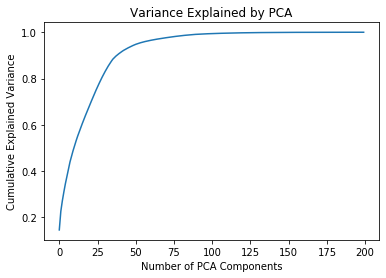

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.title('Variance Explained by PCA')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of PCA Components')

amounts = [0.8, 0.85, 0.9, 0.95, 0.99]

for explained_var in amounts:
    n_comp = pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_) 
                                           < explained_var].size
    print(f"Number of components necessary to achieve {explained_var * 100}% \
explained variance is {n_comp}")
print('\n\n')

In [93]:
pca_data = data_std.sample(frac = 0.25,
                           replace = False,
                           random_state = random_state)
pca = PCA(n_components = 200,
          random_state = random_state)
pca_data = pca.fit_transform(pca_data)

In [94]:
k_values = np.arange(2, 51, 1)
inert = np.empty_like(k_values, dtype = 'float')
sil = np.empty_like(k_values, dtype = 'float')

for i, k in enumerate(k_values):
    km = KMeans(n_clusters = k)
    km.fit(pca_data[ : , : 51])
    inert[i] = km.inertia_
    sil[i] = silhouette_score(pca_data, km.labels_)

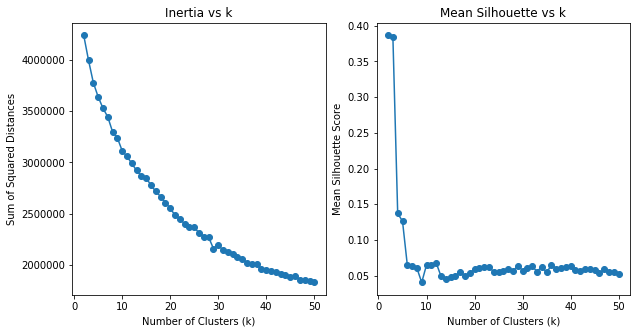

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(k_values, inert, marker = 'o')
ax[0].set_title('Inertia vs k')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Sum of Squared Distances')
ax[1].plot(k_values, sil, marker = 'o')
ax[1].set_title('Mean Silhouette vs k');
ax[1].set_ylabel('Mean Silhouette Score')
ax[1].set_xlabel('Number of Clusters (k)');

A silhouette analysis of k-means clustering with k from 2 to 50 shows low confidence in k-means ability to produce valid clusterings.
The maximum  silhouette score is at k = 2.
The score drops by about 50% when k is increased from 3 to 4.
The mean silhouette drops dramatically with increase in k, essentially flattening at a score of approximately 0.05 at k = 6.

This does not provide confidence that Kmeans is able to capture meaningful structure within the data.

### Clustering on Autoencoder Embeddings <a class="anchor" id="Autoencoder"></a>

Cluster analysis in high dimensional data is difficult.
It has been shown that autoencoders can be used to compress datasets with large dimensionality into low dimensional embeddings.
An autoencoder works by passing the input data though a series of neural network hidden layers, which often contains a bottleneck layer.
Another series of hidden layers connect the bottleneck layer to an output layer with the same dimensionality as the input.
The autoencoder is trained with SGD to find a set of weights for the hidden layers to make the output predictions resemble the input data.
The identify function is assessed by the error in the reconstruction of the original data, typically measured with mean squared error (MSE).
If the MSE is low, the embeddings created by the autoencoder likely capture most of the variance in the data.

In this case, an autoencoder is used to compress the data with over 250 dimensions into two dimensions.
Since two dimensional data can be visualized effectively, this is aid in assessment of the cluster analysis.

In [3]:
ae = AutoEncoder(data.shape[-1], 2)
ae.fit(
    data_std,
    batch_size=10000,
    epochs=500,
    loss="mse",
    optimizer="adam",
    weights=None,
    verbose=0,
    weight_id=None,
    patience=None,
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


The reconstruction error (MSE) of the autoencoder over 500 training epoches is shown below.

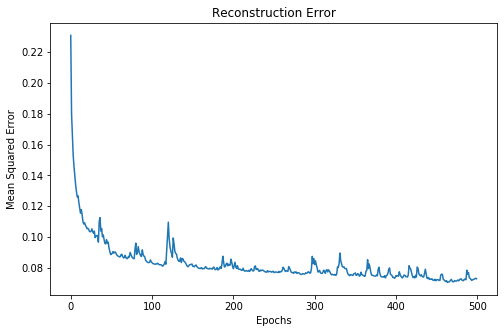

In [4]:
ae.plot_loss()

In [3]:
# reload pickled embeddings
autoendings_path = '../_pickles/autoencoder_embeddings'
print('Reloading saved embeddings from autoencoder')
with open(autoendings_path, 'rb') as pkl_file:
    vals = pickle.load(pkl_file)
# relaod random samples
autoendings_path = '../_pickles/autoencoder_embeddings_downsampled'
print('Reloading saved random selection')
with open(autoendings_path, 'rb') as pkl_file:
    ind_plot = pickle.load(pkl_file)

Reloading saved embeddings from autoencoder
Reloading saved random selection


#### Visualize the Embedding

The following plots show the 2 dimensional embedding representing the data.
The plot on the left shows the entire set, while the plot on the right shown the primary data near the center in more detail.

There appear to be well defined clusters and clusters that are more disperse.

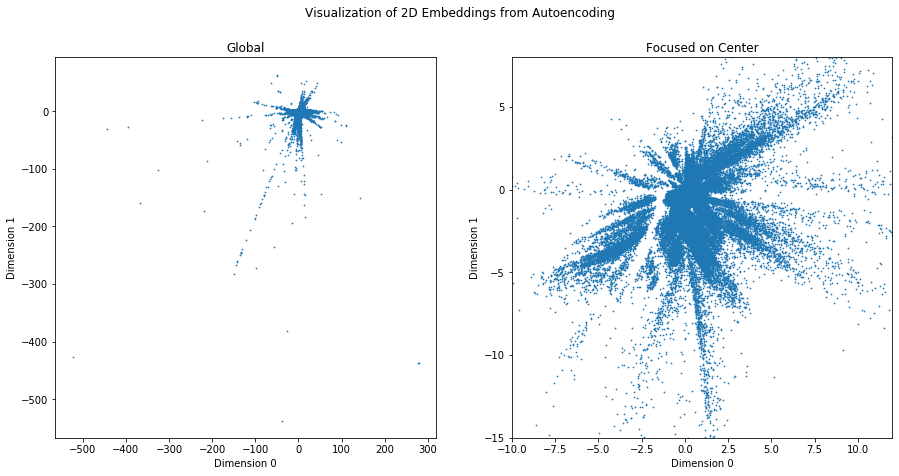

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7));
fig.suptitle('Visualization of 2D Embeddings from Autoencoding')
# visualize the full dimensions of the embeddings
ax[0].scatter(vals[:, 0], vals[:, 1], s = 0.5);
ax[0].set_xlabel('Dimension 0');
ax[0].set_ylabel('Dimension 1');
ax[0].set_title('Global');
# zoom in on the center
ax[1].scatter(vals[ind_plot, 0], vals[ind_plot, 1], s = 0.5);
ax[1].set_xlabel('Dimension 0');
ax[1].set_ylabel('Dimension 1');
ax[1].set_title('Focused on Center');
ax[1].set_xlim(-10,12)
ax[1].set_ylim(-15,8);

#### Clustering

HDBSCAN was used to create clusters.
HDBSCAN is a hierarchical based extension of DBSCAN.

Due computational complexity, only 80,000 random samples of the original data were used.
This is roughly 26.7% of the data.

In [4]:
# constuct object
scanner = hdbscan.HDBSCAN(min_cluster_size=40,
                          min_samples=5,
                          cluster_selection_epsilon = 0.025)
# fit and get labels from fit
scanner.fit(vals[ind_plot,:])
labels = scanner.labels_

# 
sampled = pd.DataFrame(data=vals[ind_plot,:],
                      columns=['one', 'two'])
sampled['labels'] = scanner.labels_
noise_count = sampled[sampled['labels'] == -1].count()[0]

print(f'There are {np.max(np.unique(labels))} clusters selected.')
print(f'Approximately {noise_count / ind_plot.size * 100:0.2f}% \
of the data is classified as noise.')

There are 93 clusters selected.
Approximately 19.49% of the data is classified as noise.


HDBSCAN selects 93 clusters, which is too many clusters for our team to examine effectively.
We will combine clusters to make interpreting the clusters more tractable.
Clusters were combined by visual inspection, combining cluster with low membership with clusters with larger memebership that appeared to angled similarly in the two dimensional space.

In [5]:
# save off original for plotting
original_embed_clustering = sampled.copy()

# reduce clusters by manual combinations
sampled['labels'].replace([24,25], 15, inplace = True)
sampled['labels'].replace([10,13], 14, inplace = True)
sampled['labels'].replace([49, 56, 59, 58, 36, 37], 45, inplace = True)
sampled['labels'].replace([79, 80, 78, 55,91, 90,
                           98, 71, 47, 93, 92], 89, inplace = True)
sampled['labels'].replace([88, 87, 48, 39, 77, 76,
                           75, 72, 60, 41, 42, 40, 38,
                           69, 34, 33, 30, 31], 81, inplace = True)
sampled['labels'].replace([22, 23, 74], 81, inplace = True)
sampled['labels'].replace([65, 68, 67, 63, 62, 57, 50,
                           51, 44, 54, 46, 43, 35, 28], 70, inplace = True)
sampled['labels'].replace([83], 82, inplace = True)
sampled['labels'].replace([61, 53, 29], 64, inplace = True)
sampled['labels'].replace([85, 84, 73, 66, 32], 86, inplace = True)
sampled['labels'].replace([16, 3, 4, 5, 7, 8, 16, 17, 2, 0,
                           1, 18, 21, 52, 27, 12, 11, 26, 20], -1, inplace = True)

**Visualization**

The reduced set of clusters are shown on the right and the original set of clusters are shown on the left.
Generally, the clusters look reasonable.
However, cluster 14 appears to be more disperse than the other clusters and cluster 70 appears to be more segmented within the cluster than other clusters.
Despite this, clusters 14 and 70 do appear to capture structure in the embeddings.

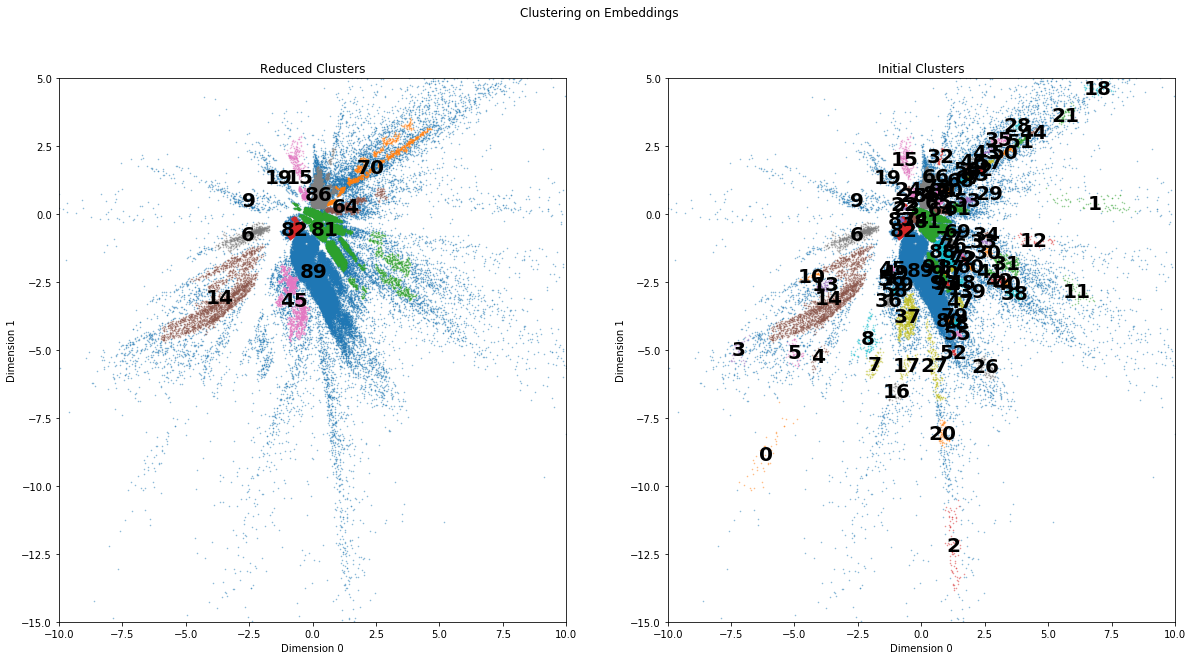

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
fig.suptitle('Clustering on Embeddings')
for label in np.unique(labels):
    ax[0].scatter(sampled.query('labels == ' + str(label)).one,
                  sampled.query('labels == ' + str(label)).two,
                  s = 0.3, alpha = 0.5);
    ax[0].set_xlim(-10,10)
    ax[0].set_ylim(-15,5);
    
    if label != -1:
        ax[0].annotate(label, 
                       sampled.loc[sampled['labels']==label,['one','two']].mean(),
                       horizontalalignment='center',
                       verticalalignment='center',
                       size=20, weight='bold') 
ax[0].set_title('Reduced Clusters')
ax[0].set_ylabel('Dimension 1')
ax[0].set_xlabel('Dimension 0')
        
for label in np.unique(labels):
    ax[1].scatter(original_embed_clustering.query('labels == ' + str(label)).one,
                original_embed_clustering.query('labels == ' + str(label)).two,
                s = 0.3, alpha = 0.5);
    ax[1].set_xlim(-10,10)
    ax[1].set_ylim(-15,5);
    
    if label != -1:
        plt.annotate(label, 
                     original_embed_clustering.loc[original_embed_clustering['labels']==label,['one','two']].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=20, weight='bold')
ax[1].set_title('Initial Clusters')
ax[1].set_ylabel('Dimension 1')
ax[1].set_xlabel('Dimension 0');

**Scoring**

The silhouette score for the original clustering and the reduced clustering are shown below.
Based on the silhouette scores, reducing the clusters appears to potentially provide a better clustering.

In [43]:
org_score = silhouette_score(original_embed_clustering.query("labels != -1")[['one', 'two']], 
                             original_embed_clustering.query("labels != -1")['labels'])

red_score = silhouette_score(sampled.query("labels != -1")[['one', 'two']], 
                             sampled.query("labels != -1")['labels'])

print(f'The silhouette score of the original clusters is {org_score:.4f}. '
      + f'The silhouette score of the reduced clusters is {red_score:.4f}.')

The silhouette score of the original clusters is -0.0577. The silhouette score of the reduced clusters is 0.1797.


**Magnitude-Membership Analysis**

Generally we would expect to see a nearly linearly increase in magnitude of a cluster as the membership increases.
From the magnitude-memebership plot below, the plots appear to exhibit a linear relationship.
As mentioned previously, clusters 70 and 14 appear to capture structure in the data so we will assume that they are not anomalous.

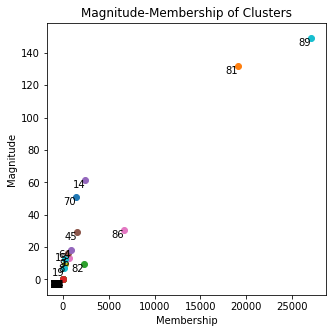

In [49]:
# drop the -1 if exists
cl = np.unique(labels)[np.unique(labels) != -1]
# pairwise distances (cluster magnitude)
magnitude = np.empty_like(cl, dtype = 'float')
card = np.empty_like(cl)

for i, label in enumerate(cl):
    # get center
    center = sampled.loc[sampled['labels']==label,['one','two']].mean().values.reshape(1,2)
    # calculate distances from center
    diff = sampled.query('labels == ' + str(label))[['one', 'two']].values - center
    card[i] = diff.shape[0]
    magnitude[i] = np.sqrt((diff * diff).sum(1).sum())

fig, ax = plt.subplots(figsize = (5, 5))
for c, m, label in zip(card, magnitude, cl):
    ax.scatter(c, m)
    ax.annotate(label, 
                 (c, m),
                 horizontalalignment='right',
                 verticalalignment='top',
                 size=10) 
ax.set_ylabel('Magnitude')
ax.set_xlabel('Membership');
ax.set_title('Magnitude-Membership of Clusters');

### Performance Comparison

compare with silhouette plot?

### Cluster Interpretation

A decision tree was used to determine the difference between the clusters.

Feature selection is a necessary first step in interpretation of the clusters because this data set contains over 300 features.
Tree-based importances were used to perform feaeture selection.
As shown in the diagram below, a random forest hyperparameter search was performed first using the cluster labels as the classification target.
Once a good set of hyperparameters were found, the data was randomly split into 10 segments and a random forest was fit on each segment.
The Gini feature importances were extracted from each model and the average importance was provided.
Weighted F1 score was used as the classification metric.

**Feature Selection Flow**

![](../_images/TreeImportances.png)

**Random Forest Feature Importance**

The following code follows the flow shown in the diagram above.
The random forests are scored with a weighted F1 score for the multi-class classification of the cluster labels.

Due to memory requirements, the random parameter search is performed with 50,000 randomly selected data points which is about 17% of the data.

In [7]:
data_untransformed_sampled = data.iloc[ind_plot, :].copy()

In [8]:
# estimate best model parameters with 3-fold cv scoring on weighted F1
ti = TreeImportances('f1_weighted', 3, random_state = 42, njobs = 1)

In [9]:
# only run 10 random search iterations
# use 10 models to estimate importances
ti.fit(data_untransformed_sampled.iloc[ : 50000, : ], 
       sampled['labels'].values[ : 50000],
       'random', importance_estimators = 10)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 4.0min
[CV] n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV]  n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 4.1min
[CV] n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 4.0min
[CV] n_estimators=1250, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1250, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 4.0min
[CV] n_estimators=1250, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1250, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 4.0min
[CV] n_estimators=1250, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1250, min

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 132.6min finished


Fitting on split 1.
Fitting on split 2.
Fitting on split 3.
Fitting on split 4.
Fitting on split 5.
Fitting on split 6.
Fitting on split 7.
Fitting on split 8.
Fitting on split 9.


The best parameters found by random search are shown below.

In [10]:
best_params = ti.best_parameters; best_params

{'n_estimators': 1250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [23]:
print('Reloading saved best parameters')
with open('../_pickles/autoencoder_rf_best_params', 'rb') as pkl_file:
    best_params = pickle.load(pkl_file)

Reloading saved best parameters


**Relative Feature Importance**

Once the feature importances were estimated by the random forests,
 the features were arranged by the mean feature importance in descending order
 (shown in a table below).
A plot of the relative feature importance is shown below.
The x-axis refers to the feature importance table index.

Based on the plot, the feature importance falls off rapidly and starts to flatten near 50.
The first 50 features are the primary features used in discriminating between clusters.

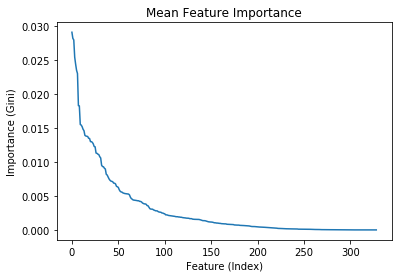

In [11]:
plt.plot(ti.importances.importance_mean);
plt.title('Mean Feature Importance');
plt.xlabel('Feature (Index)');
plt.ylabel('Importance (Gini)');

In [12]:
# write out whole table
with open("../html/tree_importances_autoencoder_embeddings.html", "w") as out_file:
    out_file.write(ti.importances.to_html(index = False))
# write out just the aggragate fields
with open("../html/mean_tree_importances_autoencoder_embeddings.html", "w") as out_file:
    out_file.write(ti.importances[['features','importance_mean','importance_sd']].to_html(index = False))

**Feature Importance Table**

The following table shows the feature importance mean and standard deviation for each feature in descending order.

In [13]:
IFrame("../html/mean_tree_importances_autoencoder_embeddings.html", width=980, height=400)

To assess the validity of using the top 50 features, we will fit a random forest on the top 50 features and calculate the f1 score on a holdout set.
The holdout set was not used in the feature importance step.

In [14]:
rf = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                            min_samples_split = best_params['min_samples_split'],
                            min_samples_leaf = best_params['min_samples_leaf'],
                            max_features = best_params['max_features'],
                            max_depth = best_params['max_depth'],
                            bootstrap = best_params['bootstrap'],
                            random_state = random_state)
# fit a classifier on the first 50 features
rf.fit(data_untransformed_sampled[ti.importances.features[:50]].iloc[ : 50000, : ],
       sampled['labels'].values[ : 50000])
pred_labels = rf.predict(
    data_untransformed_sampled[ti.importances.features[:50]].iloc[50000 : , : ]
)

In [21]:
print('Reloading saved predictions')
with open('../_pickles/autoencoder_rf_predictions', 'rb') as pkl_file:
    pred_labels = pickle.load(pkl_file)

In [15]:
f1s = f1_score(sampled['labels'].values[50000 : ],
               pred_labels, average = 'weighted')
print(f'The weighted F1 score on the holdout set is {f1s:.4f}.')

The weighted F1 score on the holdout set is 0.8475.


In [16]:
binarized_labels = label_binarize(sampled['labels'].values[50000 : ],
                                  classes = np.unique(sampled['labels'].values[50000 : ]))
proba = rf.predict_proba(
    data_untransformed_sampled[ti.importances.features[:50]].iloc[50000 : , : ]
)

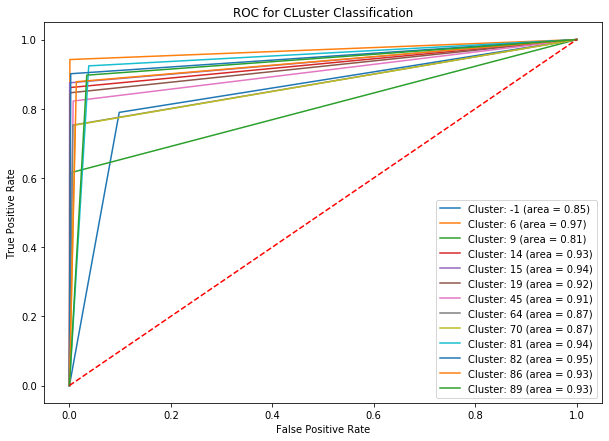

In [17]:
binarized_labels = label_binarize(sampled['labels'].values[50000 : ],
                                  classes = np.unique(sampled['labels'].values[50000 : ]))
proba = rf.predict_proba(
    data_untransformed_sampled[ti.importances.features[:50]].iloc[50000 : , : ]
)

plt.figure(figsize = (10, 7))
for i, label in enumerate(np.unique(sampled['labels'].values[50000 : ])):

    fpr = dict() # false positive rate
    tpr = dict() # true positive rate
    roc_auc = dict() # area under the curve

    fpr, tpr, thresholds = roc_curve(np.round(proba[:, i]), binarized_labels[:, i])
    roc_auc = auc(fpr,tpr)

    plt.plot(fpr, tpr, label = 'Cluster: ' + str(label) + f' (area = {roc_auc:.2f})')
plt.legend()
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for CLuster Classification');

In [19]:
pd.crosstab(pd.Series(sampled['labels'].values[50000 : ], name = 'True Label'),
            pd.Series(pred_labels, name = 'Predicted Label'))

Predicted Label,-1,6,9,14,15,19,45,64,70,81,82,86,89
True Label,,,,,,,,,,,,,
-1,4276,11,0,126,27,5,87,45,88,461,79,255,909
6,6,202,0,14,0,0,0,0,0,0,0,0,0
9,14,0,9,0,1,0,1,1,0,24,3,9,38
14,50,1,0,846,0,1,0,0,1,0,0,0,0
15,7,0,0,0,179,0,0,0,0,0,0,0,0
19,1,0,0,0,0,18,0,3,1,0,0,32,1
45,64,0,0,0,0,0,404,0,0,26,0,6,64
64,75,0,0,0,0,0,0,192,1,1,0,71,2
70,262,0,0,0,0,0,0,1,249,0,0,21,0


The random forest fit with the 50 most important features scores 0.8449 weighted F1 score on the holdout data set.
This result is close to the F1 score used to select the best parameters by internal cross validation (0.7649),
 providing evidence that we can procede with the top 50 features.

**Decision Tree Interpretation**

In [ ]:
dtc = DecisionTreeClassifier(random_state=42,
                             min_samples_split = np.sqrt(number_of_instances).astype(int),
                             max_leaf_nodes = 13)

dtc.fit(data_untransformed_sampled[top_50_features].iloc[ : , : ],
        sampled['labels'][ : ])

In [ ]:
preds = dtc.predict(data_untransformed_sampled[top_50_features].iloc[ : , : ])

# need to update this to use pydotplus

# Creates dot file named tree.dot
export_graphviz(
            dtc,
            out_file =  "./myTreeName.dot",
            feature_names = list(data_untransformed_sampled[top_50_features].columns),
            class_names = dtc.classes_.astype(str),
            filled = True,
            rounded = True)

In [ ]:
pd.crosstab(pd.Series(preds, name = 'Predicted Label'), 
            pd.Series(sampled['labels'][ : ], name = 'Label'))

**Cluster Prediction / Interpretation System**

Some words here or diagram to section 4.1?

![](../_images/Clustering_System.png)

## 3.2 Option B: Association Rule Mining (Q3B)<a class="anchor" id="Rule_mining"></a>

Info

## 3.3 Option C: Collaborative Filtering (Q3C)<a class="anchor" id="Collaborative"></a>

Info

# 4. Stage Five - Deployment (Q3) <a class="anchor" id="Deployment"></a>

## 4.1 Next Stage Deployment <a class="anchor" id="Deployment"></a>

The next stage in the CRISP-DM is deployment. After model building and evaluation, we are ready to deploy our code representation of the model into a production environment and solve our original business problem.
Our business problem is to give Home Credit loan evaluators access to a model that evaluates an applicant’s current and past financial history in determining whether to approve the requested loan.

#### How useful is your model for interested parties?<a class="anchor" id="Useful"></a>

We believe this model would be useful for loan departments loan evaluators. This is contingent of discovering how some of the external variables are created. With this and some additional consistancy in top scoring features we could improve the accuracy

#### How would you measure the model's value if it was used by these parties?<a class="anchor" id="Value"></a>

This model should be tested in parrellel to present evaluation proceess. Then after a set period of time compare human evaluation to model based accuracy. If the results were the same, the minimum resulting savings would be the salaries of the loan evaluators. Added value would result from the acceleration of the loan approval process.

#### How would your deploy your model for interested parties?<a class="anchor" id="Deploy"></a>

Depending on the resources,  available, models can be deployed as batch or real-time predictions. Home Credits current process is a batch implementation. The applicant fills out the form which is then digitized and sent to the loan approval department. During the loan approval, the collected data will need to be cleaned and normalized before processed through the machine learning predictive model.

#### How often would the model need to be updated?<a class="anchor" id="Update"></a>

The metrics for the customer is continually updated. On a scheduled cycle, this new dataset is analyzed through the current model. Doing batch cycles will allow for consistency in whether an applicant is approved or not.  However, model designs will change as newer technology are available or changing business environments make reengineering required.

#### What other data should be collected?<a class="anchor" id="Collect"></a>

In addition to the clarification of data we have described above, there would be a tremendous value in the financials for the industry that the individual is working. These financials could assist in prediction of any future concerns for the applicants present income.

Below is a typical example of a batch deployment \[1\].

<img src="../_images/batchdeployment_process.png" style="width:800px;height:375px"/>



## References

\[1\] J. Kervizic, Overview of Different Approaches to Deploying Machine Learning Models in Production, June 2016.
Accessed on: Feb. 15, 2019. \[Online\].
Available: https://www.kdnuggets.com/2019/06/approaches-deploying-machine-learning-production.html

# A1. Parameter Tuning <a class="anchor" id="A2"></a>

The code and output of model tuneing in shown below.